# 케라스를 배웁니다

목표: Iris 데이터를 분류하고, 그 과정에서 케라스 워크플로우를 파악합니다  

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as K

데이터 불러오기 

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.shape

(150, 5)

In [7]:
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
label = df.iloc[0:100, 4].values
label = np.where(label == 'Iris-setosa', 0, 1)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
features = df.iloc[0:100, [0,2]].values
features.shape

(100, 2)

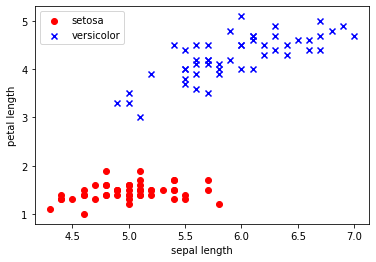

In [10]:
plt.scatter(features[:50, 0], features[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(features[50:100, 0], features[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

### 모델링

sequential api

In [14]:
model = K.models.Sequential()
model.add(K.layers.Dense(1, activation='sigmoid'))

In [15]:
# 같은 모델링 방법1
model = K.models.Sequential([
    K.layers.Dense(1, activation='sigmoid')
])

functional api

In [17]:
# 같은 모델링 방법2
input = K.layers.Input(shape=(2,))
output = K.layers.Dense(1, activation='sigmoid')(input)

model = K.models.Model(inputs=input,
                       outputs=output)

compile 

In [18]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

fit

In [19]:
model.fit(X_train, y_train,
          epochs=30)

Epoch 1/30
3/3 [==============================] - 1s 4ms/step - loss: 1.2534 - accuracy: 0.5250
Epoch 2/30
3/3 [==============================] - 0s 4ms/step - loss: 1.1329 - accuracy: 0.5250
Epoch 3/30
3/3 [==============================] - 0s 4ms/step - loss: 1.0338 - accuracy: 0.5250
Epoch 4/30
3/3 [==============================] - 0s 3ms/step - loss: 0.9532 - accuracy: 0.5250
Epoch 5/30
3/3 [==============================] - 0s 3ms/step - loss: 0.8863 - accuracy: 0.5250
Epoch 6/30
3/3 [==============================] - 0s 3ms/step - loss: 0.8430 - accuracy: 0.5250
Epoch 7/30
3/3 [==============================] - 0s 4ms/step - loss: 0.8038 - accuracy: 0.5250
Epoch 8/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7786 - accuracy: 0.5250
Epoch 9/30
3/3 [==============================] - 0s 4ms/step - loss: 0.7601 - accuracy: 0.5250
Epoch 10/30
3/3 [==============================] - 0s 4ms/step - loss: 0.7462 - accuracy: 0.5250
Epoch 11/30
3/3 [======================

evaluate

In [20]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.6288 - accuracy: 0.4000 - 246ms/epoch - 246ms/step


[0.6287615299224854, 0.4000000059604645]